You have data that has a **LOT** of dimensions which means that analyzing it could be a computational pain. In this case, **Principal Component Analysis (PCA)** could come in handy, and you could, with potentially minimal loss of information, reduce the dimensions of your dataset and be on your way to pattern recognition.

Thus the desired outcome of PCA is to project a feature space (your dataset consisting of n d-dimensional samples) onto a smaller subspace (say, with k dimensions) that represents your data reasonably “well”. Sound useful? Read on.

But how do you choose the value of k? If you hate Linear Algebra, you might want to tune this out (but if you really hate Linear Algebra, why are you even here?). To know the best value of k, you have to compute **eigenvectors** (the components) from your data and collect them in a 'scatter-matrix' (or you could alternatively calculate them from the covariance matrix). Each of those eigenvectors is associated with an eigenvalue, which will tell you about the “length” or “magnitude” of the eigenvectors. If you notice that all the eigenvalues are of very similar magnitude, this is a good indicator that your data is already in a “good” subspace, and PCA is not going to be useful.

On the other hand (and this is what we want) if some of the eigenvalues are much much higher than others, you're gonna keep only those eigenvectors with the much larger eigenvalues, since they contain more information about our data distribution (remember the thing about your new dataset representing the older one reasonably 'well'?). In the same vein, eigenvalues that are close to 0 are less informative and you should probably dropp those when you construct the new feature subspace.

Too much unnecessary rambling? Want to get to the meat? Here's a **quick summarization on how to do a Principal Component Analysis**:

1. Take the whole dataset consisting of d-dimensional samples ignoring the class labels
2. Compute the means for every dimension of the whole dataset
3. Compute the scatter matrix or alternatively, the covariance matrix of the whole data set
4. Compute eigenvectors ($\epsilon_1$,$\epsilon_2$,...,$\epsilon_d$) and corresponding eigenvalues ($\lambda_1$,$\lambda_2$,...,$\lambda_d$)
5. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d\times k$ dimensional matrix **$W$** (where every column represents an eigenvector)
6. Use this $d\times k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: **$y$** $=$ **$W^T \times x$** (where **$x$** is a **$d \times 1$**-dimensional vector representing one sample, and **$y$** is the transformed **$k \times 1$**-dimensional sample in the new subspace)

Let's work on a problem where we have a dataset that has dimensions 40 $\times$ 3, which we will reduce to one with dimensions 40 $\times$ 2. We'll form a dataset that has 2 classes (with each class having 20 data points)

In [10]:
import numpy as np

np.random.seed(0) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

The code above created two datasets of dimensions 3 $\times$ 20, each one belonging to one class of either 0 or 1 and having the form:

$\left(\begin{array}{cccc} x_{1_1} & x_{1_2} & ... & x_{1_{20}} \\ x_{2_1} & x_{2_2} & ... & x_{2_{20}} \\ x_{3_1} & x_{3_2} & ... & x_{3_{20}} \end{array}\right)$

A 3-D representation of our data is as follows:

Populating the interactive namespace from numpy and matplotlib


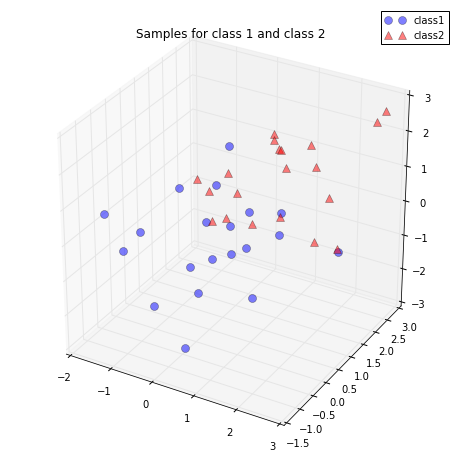

In [12]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#### Step 1: Taking the whole dataset ignoring the class labels

In [18]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples[:,1:6] #the first six columns of the dataset

array([[ 2.2408932 ,  0.95008842,  0.4105985 ,  0.76103773,  0.33367433],
       [ 1.86755799, -0.15135721,  0.14404357,  0.12167502,  1.49407907],
       [-0.97727788, -0.10321885,  1.45427351,  0.44386323, -0.20515826]])

#### Step 2: Computing the d-dimensional mean vector

In [19]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.69887368]
 [ 0.80019884]
 [ 0.39876272]]


#### Step 3: Computing the Scatter (or the Covariance) matrix

The only difference between the Scatter and Covariance matrices is that a scaling factor is used for the eigenvalues of the Covariance matrix (which is just N-1, N being the number of columns of the dataset). Thus the eigenvectors are identical for these two matrices, only the eigenvalues are scaled differently by a constant factor. We'll calculate the Covariance matrix since it is easier to do so using the in-built `numpy.cov()` function

In [31]:
mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.40392813  0.31155492  0.53818525]
 [ 0.31155492  1.36147317  0.4648993 ]
 [ 0.53818525  0.4648993   1.44768008]]


#### Step 4: Computing the eigenvectors and corressponding eigenvalues

In [33]:
eig_val, eig_vec = np.linalg.eig(mat)
print ('Eigenvalues:', eig_val, '\n')
print ('Eigenvectors: \n', eig_vec)

Eigenvalues: [ 2.29290547  1.07218191  0.84799399] 

Eigenvectors: 
 [[-0.5690384  -0.62675178 -0.53233213]
 [-0.51164745  0.77664688 -0.36747315]
 [-0.64374854 -0.06326004  0.76261785]]


#### Step 5: Sorting the eigenvectors by their eigenvalues and choosing those with the largest eigenvalues

In order to decide which eigenvectors to want to drop for the lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. As stated before, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we should drop. We'll thus rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [34]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

2.29290547481
1.07218190984
0.847993992474


We'll now combine the two eigenvectors with the highest eigenvalues to construct our $d \times k$ dimensional eigenvector matrix **$W$**

In [35]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.5690384  -0.62675178]
 [-0.51164745  0.77664688]
 [-0.64374854 -0.06326004]]


#### Step 6: Transforming the samples onto the new subspace

As described before, using the equation: **$y$** $=$ **$W^T \times x$**, we can transform our samples onto the new subspace

In [36]:
transformed = matrix_w.T.dot(all_samples)

Let us visualize our new 2-D subspace now:

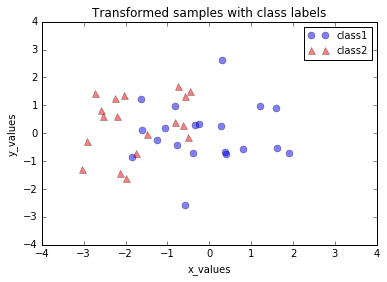

In [38]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

To be sure what we've done is right, we can compare our result with the output of the built-in `PCA()` class from the `sklearn.decomposition` library. Using the `n_components` parameter, we can specify how many dimensions we want our new subspace to be.

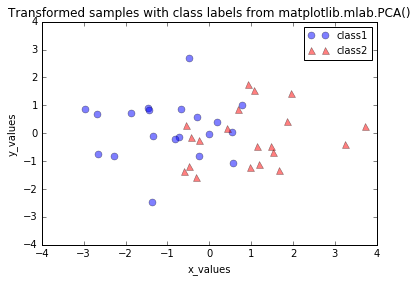

In [39]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2) # specify the number of components
sklearn_transf = sklearn_pca.fit_transform(all_samples.T) # perform the dimensionality reduction

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

The plot above seems to be the exact mirror image of the plot that we got from our step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative. Since the eigenvectors are scaled to the unit length 1, we can simply multiply the transformed data by (−1) to revert the mirror image.

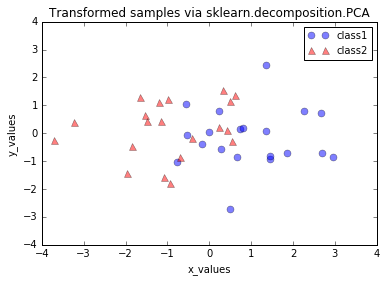

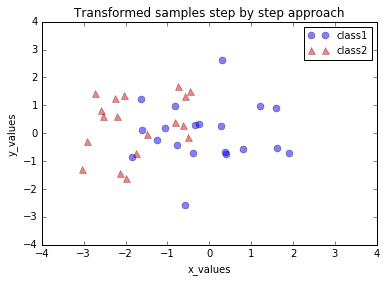

In [40]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()

Looking at the two plots, it can be seen that the distributions along the component axes look identical, only the center of the data is slightly different (but that's okay!)